In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
from itertools import combinations
from mpl_toolkits.mplot3d import Axes3D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow.keras as keras






2024-06-12 11:43:31.937616: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Creating toy dataset for regression
Using numpy, we can create a one dimensional input array and evaluate a function with some added noise for the
true output values.

In [2]:
x=np.linspace(-20,20,10000) 
y=x**4-300*x**2+np.random.normal(0,1000,*x.shape) #bell shaped potential
y=200*np.sin(x)*np.exp(-np.absolute(x)/10.)+np.random.normal(0,10,*x.shape) #decaying sin wave



## Data Visualization
We visualize a small subset of the data using matplotlib

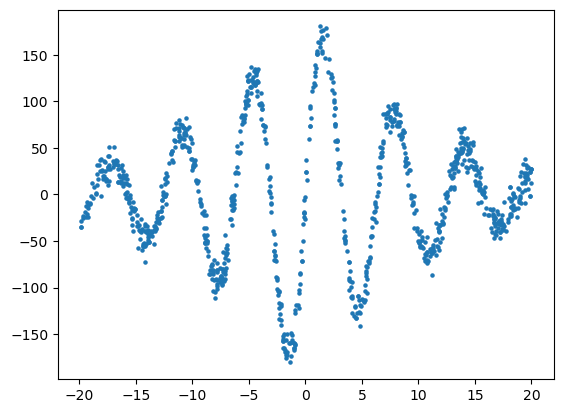

In [3]:
choice=np.random.randint(0,len(x),1000)
plt.scatter(x[choice],y[choice],s=5)

## Divide training and validation datasets
We divide the x and y value to training and validation datasets using numpy methods. 
It is also available in scikit-learn as [sklearn.model_selection.train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) 

In [4]:
all_inds=np.arange(len(x))
np.random.seed(145431)
np.random.shuffle(all_inds)
split_point=int(0.75*len(x))
x_train,y_train=x[all_inds[:split_point]],y[all_inds[:split_point]]
x_val,y_val=x[all_inds[split_point:]],y[all_inds[split_point:]]
print (x_train.shape,y_train.shape)
print (x_val.shape,y_val.shape)

(7500,) (7500,)
(2500,) (2500,)


## Create Sequential model 
We create a model using the Sequential API of keras. You can play around with the width and depth of the network to see the speed and the accuracy of the function approximation, and the speed of training for broader vs deeper networks. 
Play around with the three architecture choices and see the accuracy and the speed of convergence for each choice for the highly fluctuating function. From the result one can get a notion of the word ``deep" being ubiq

In [40]:
# Choice 1: large width shallow network
width=75
depth=1
# Choice 2: small width deep network with same number of nodes as choice 1 
width=20
depth=5
# Choice 3: single layer with same number of parameters as choice 2 
#width=335
#depth=1

model=Sequential()
model.add(Dense(width,input_shape=(1,),activation="relu",bias_initializer="glorot_normal"))
for _ in range(depth-1):
    model.add(Dense(width,activation="relu"))
model.add(Dense(1,activation="linear"))
model.compile(loss="mean_squared_error",optimizer=keras.optimizers.Adam())
model.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_92 (Dense)            (None, 20)                40        
                                                                 
 dense_93 (Dense)            (None, 20)                420       
                                                                 
 dense_94 (Dense)            (None, 20)                420       
                                                                 
 dense_95 (Dense)            (None, 20)                420       
                                                                 
 dense_96 (Dense)            (None, 20)                420       
                                                                 
 dense_97 (Dense)            (None, 1)                 21        
                                                                 
Total params: 1,741
Trainable params: 1,741
Non-train

## Training the model
We train the compiled model using the inbuilt fit method of keras models, and compare the predicted output of the network for ease $n$ epochs. Note that we have used epoch=1 in the input to the fit method for each of handling the plotting. For actual training purposes, the number of epochs should be directly fed into the fit method.

79/79 [==============================] - 0s 479us/step
Epoch: 5


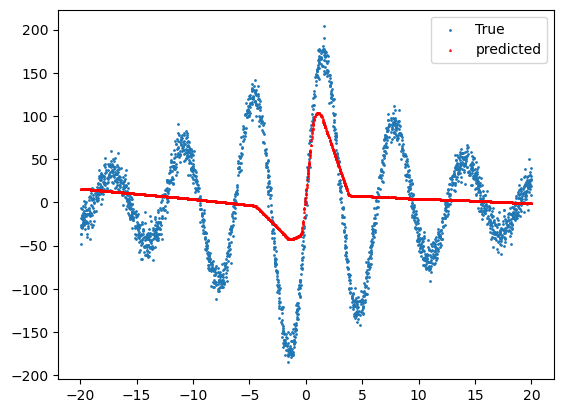

79/79 [==============================] - 0s 563us/step
Epoch: 10


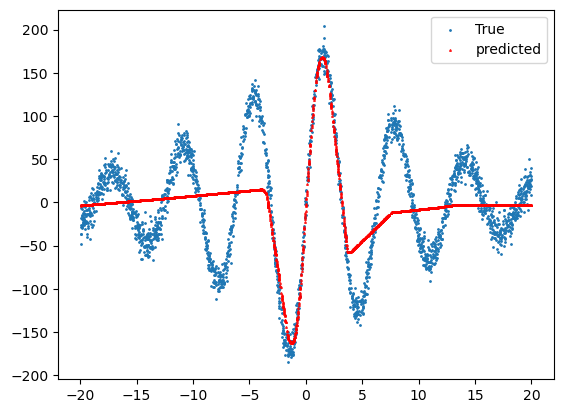

79/79 [==============================] - 0s 471us/step
Epoch: 15


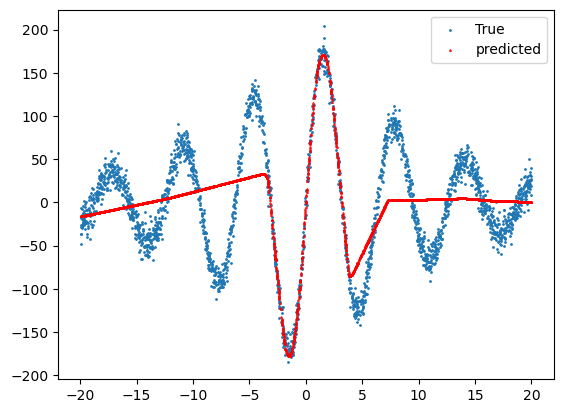

79/79 [==============================] - 0s 483us/step
Epoch: 20


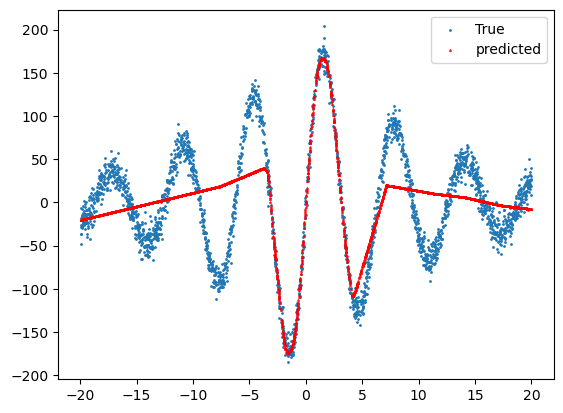

79/79 [==============================] - 0s 622us/step
Epoch: 25


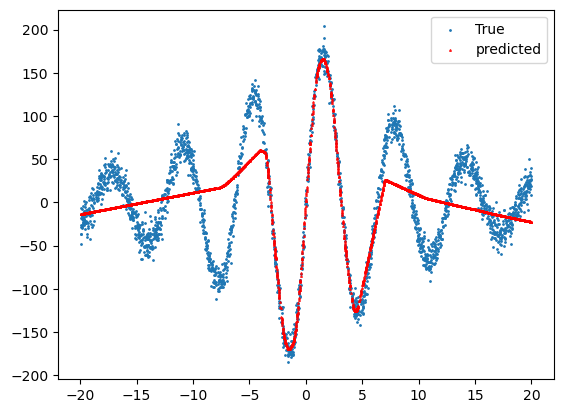

79/79 [==============================] - 0s 506us/step
Epoch: 30


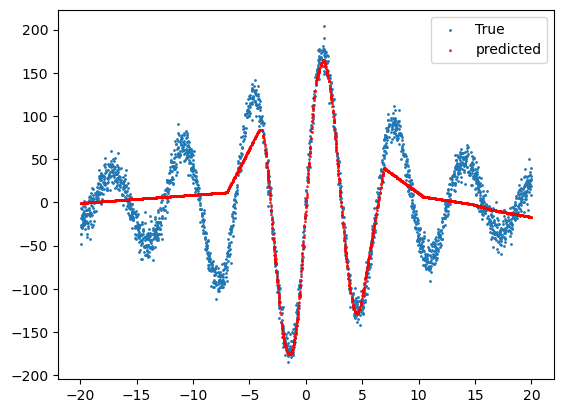

79/79 [==============================] - 0s 576us/step
Epoch: 35


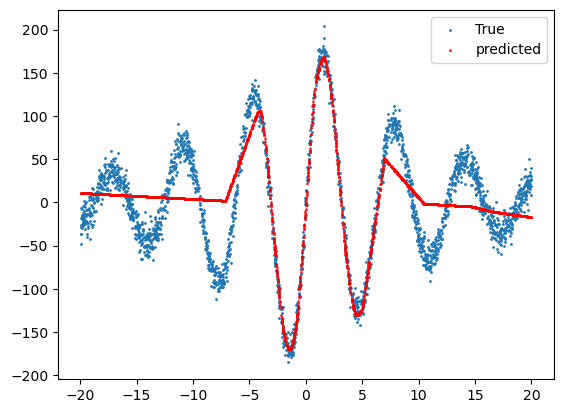

79/79 [==============================] - 0s 572us/step
Epoch: 40


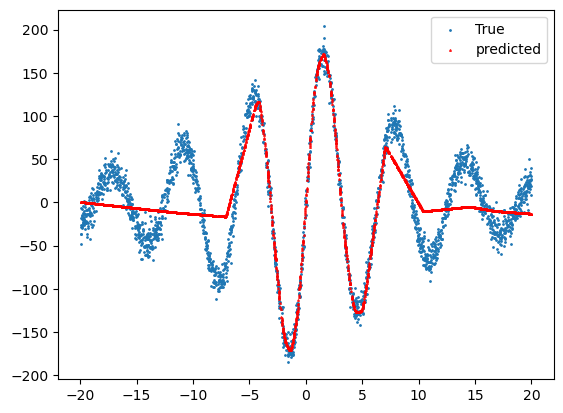

79/79 [==============================] - 0s 473us/step
Epoch: 45


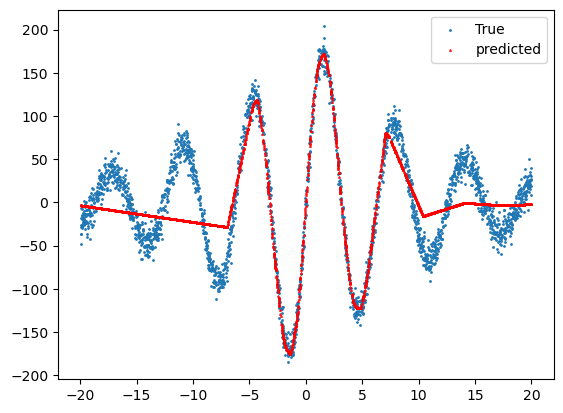

79/79 [==============================] - 0s 526us/step
Epoch: 50


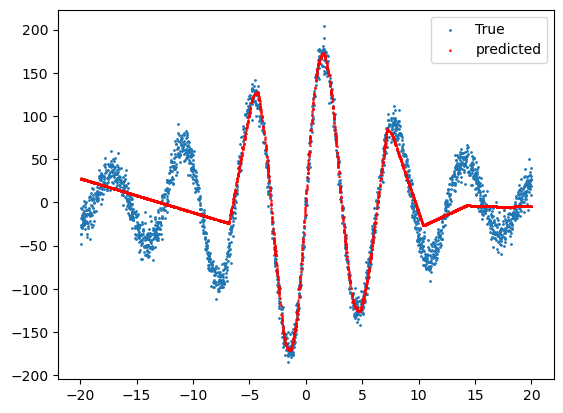

79/79 [==============================] - 0s 504us/step
Epoch: 55


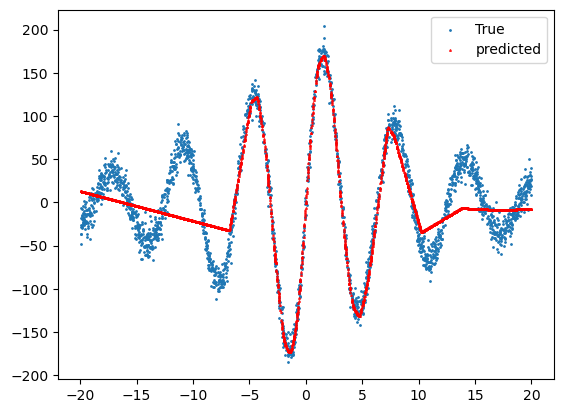

79/79 [==============================] - 0s 555us/step
Epoch: 60


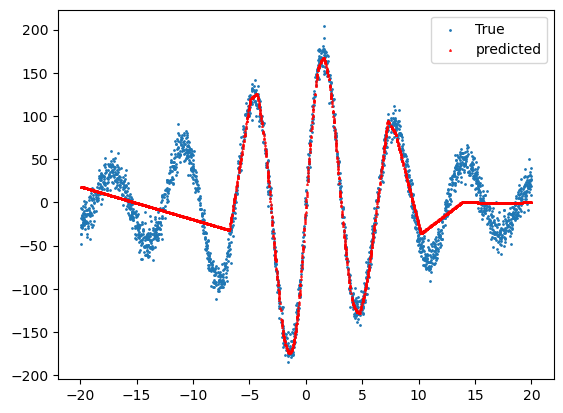

79/79 [==============================] - 0s 530us/step
Epoch: 65


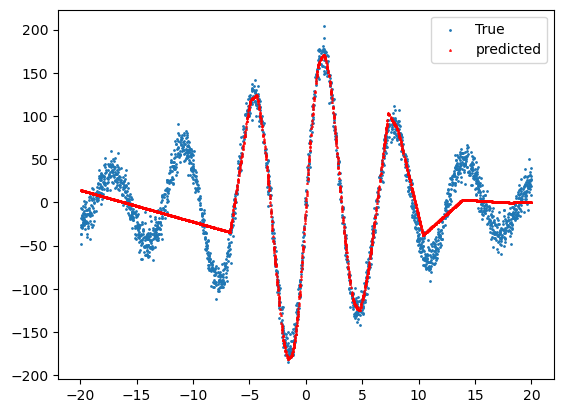

79/79 [==============================] - 0s 603us/step
Epoch: 70


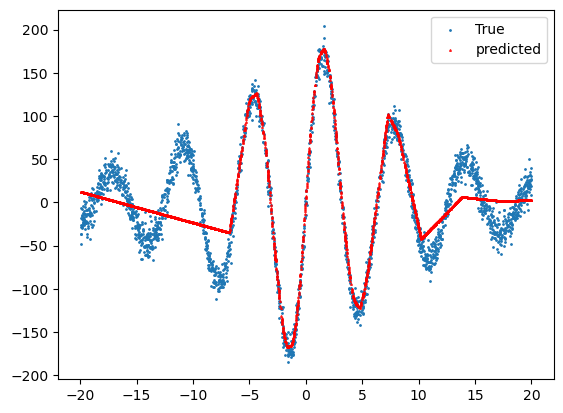

79/79 [==============================] - 0s 590us/step
Epoch: 75


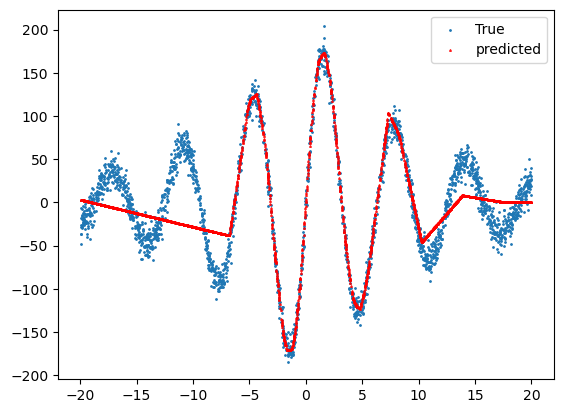

79/79 [==============================] - 0s 531us/step
Epoch: 80


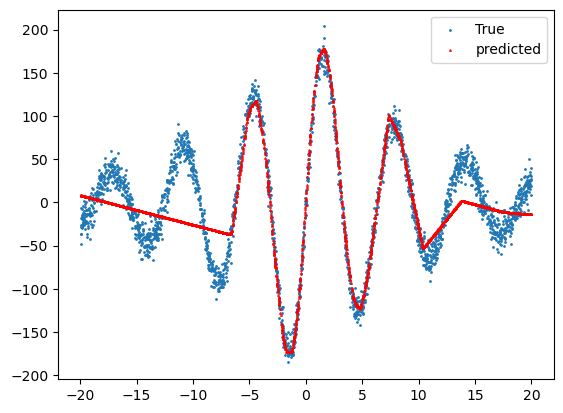

79/79 [==============================] - 0s 455us/step
Epoch: 85


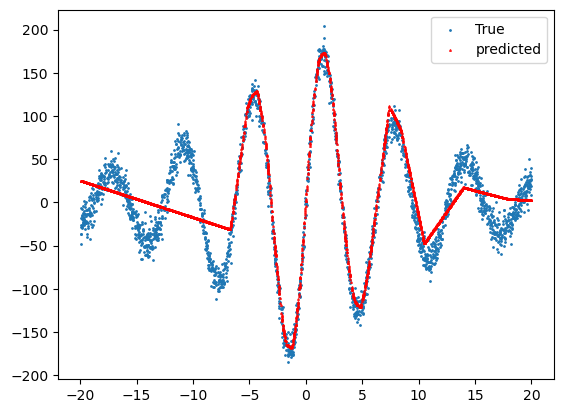

79/79 [==============================] - 0s 515us/step
Epoch: 90


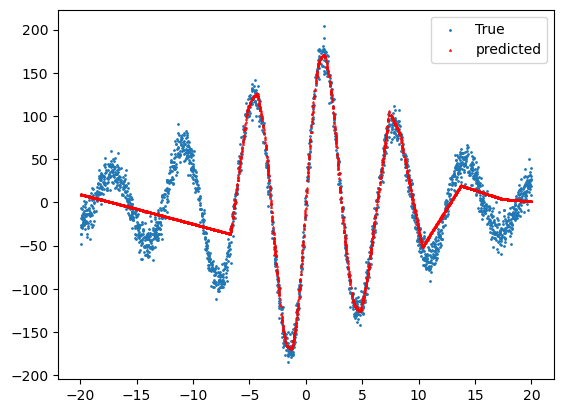

79/79 [==============================] - 0s 589us/step
Epoch: 95


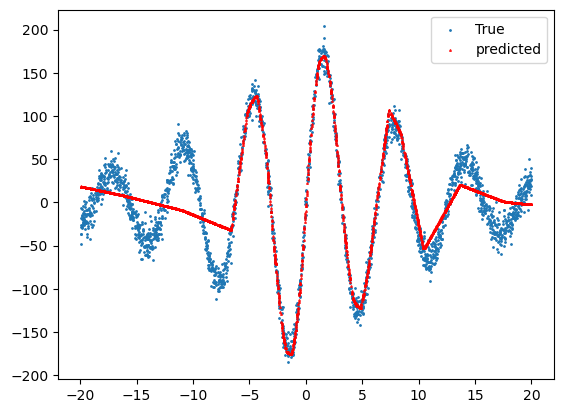

79/79 [==============================] - 0s 473us/step
Epoch: 100


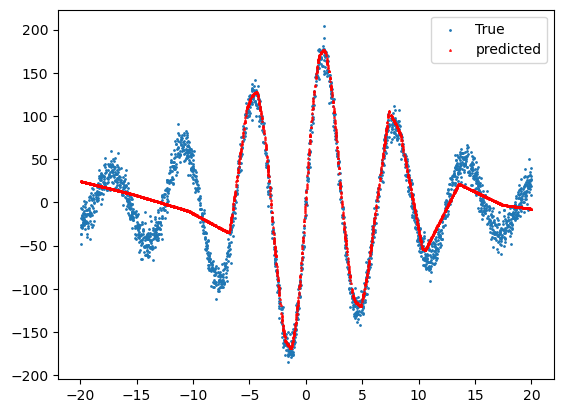

79/79 [==============================] - 0s 505us/step
Epoch: 105


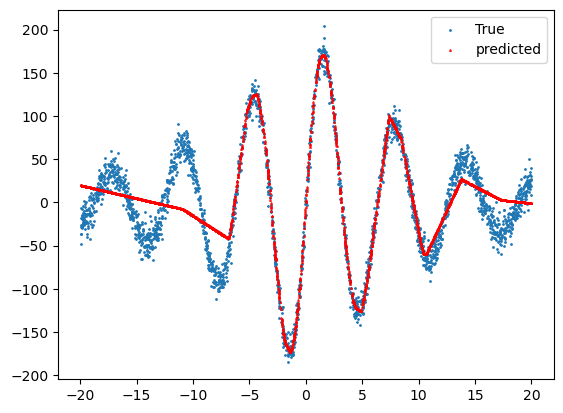

79/79 [==============================] - 0s 596us/step
Epoch: 110


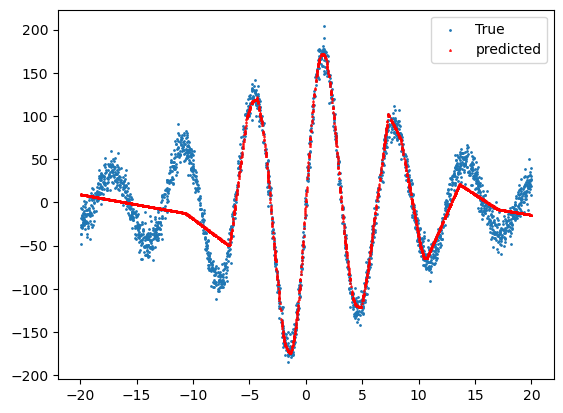

79/79 [==============================] - 0s 470us/step
Epoch: 115


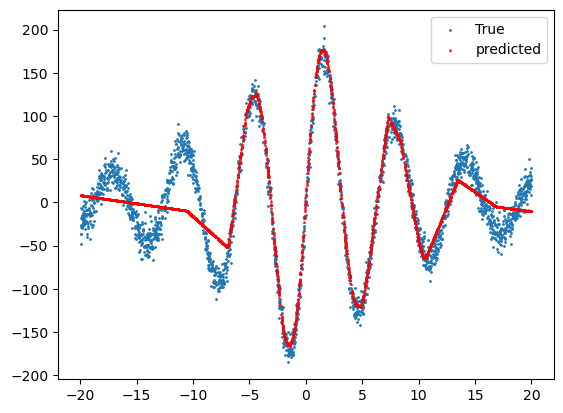

79/79 [==============================] - 0s 688us/step
Epoch: 120


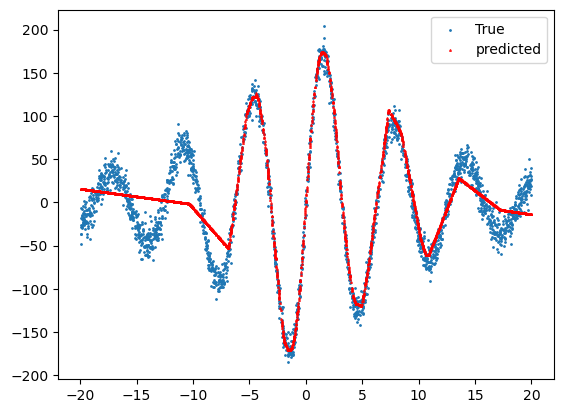

79/79 [==============================] - 0s 528us/step
Epoch: 125


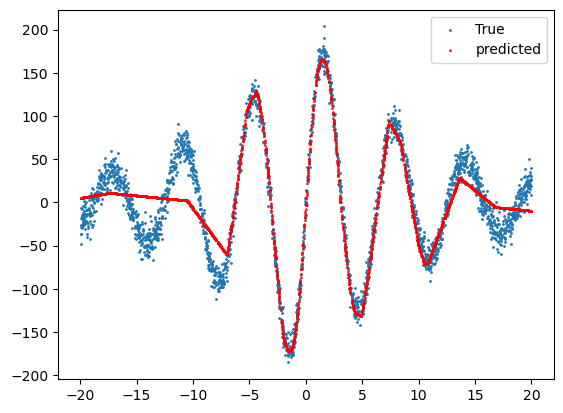

79/79 [==============================] - 0s 466us/step
Epoch: 130


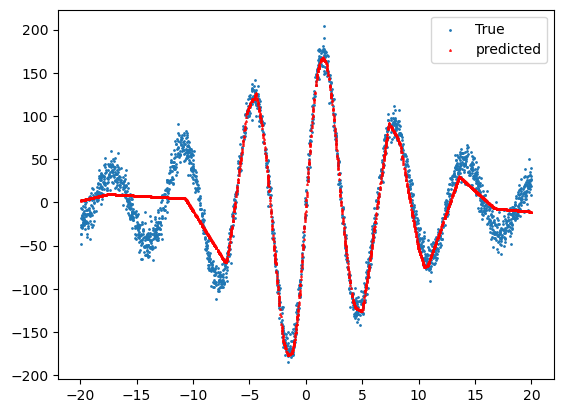

79/79 [==============================] - 0s 537us/step
Epoch: 135


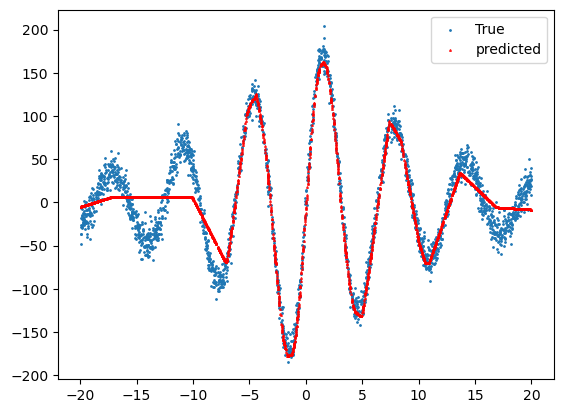

79/79 [==============================] - 0s 483us/step
Epoch: 140


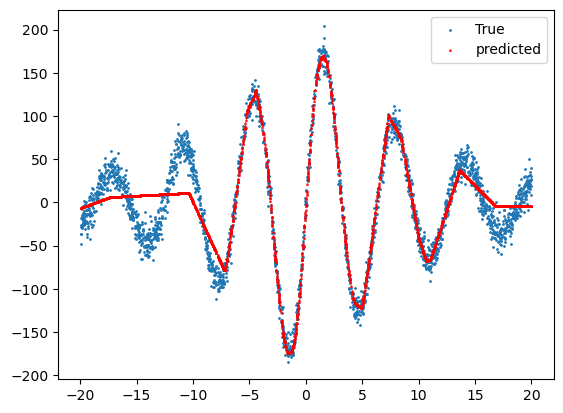

79/79 [==============================] - 0s 450us/step
Epoch: 145


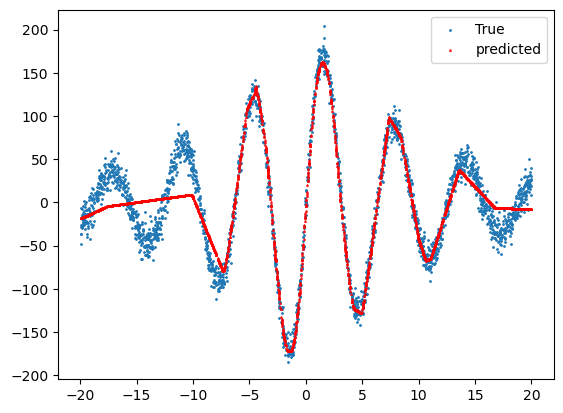

79/79 [==============================] - 0s 499us/step
Epoch: 150


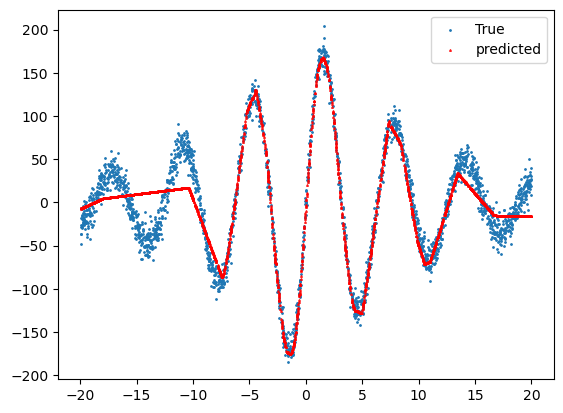

79/79 [==============================] - 0s 585us/step
Epoch: 155


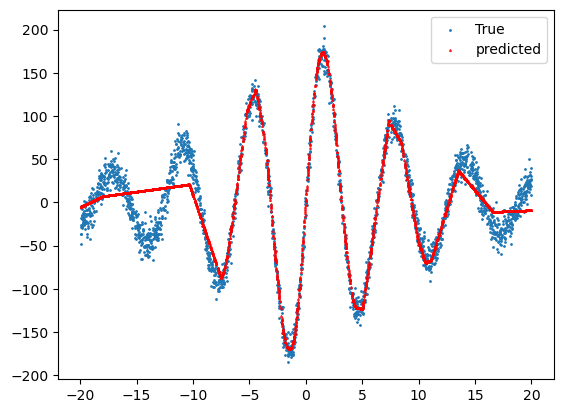

79/79 [==============================] - 0s 603us/step
Epoch: 160


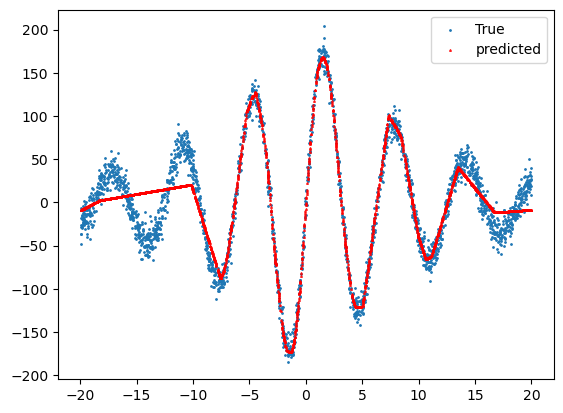

79/79 [==============================] - 0s 579us/step
Epoch: 165


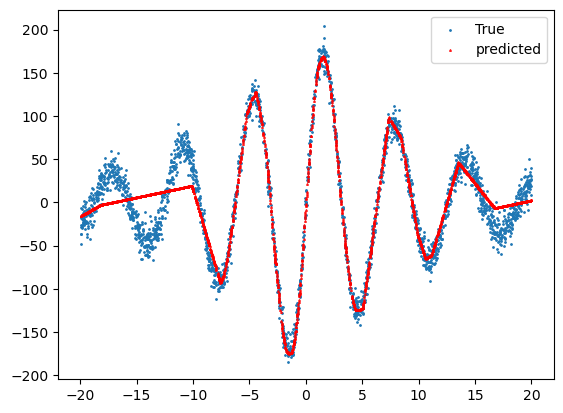

79/79 [==============================] - 0s 513us/step
Epoch: 170


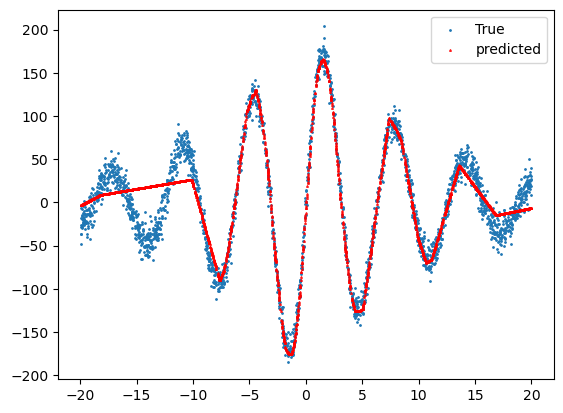

79/79 [==============================] - 0s 520us/step
Epoch: 175


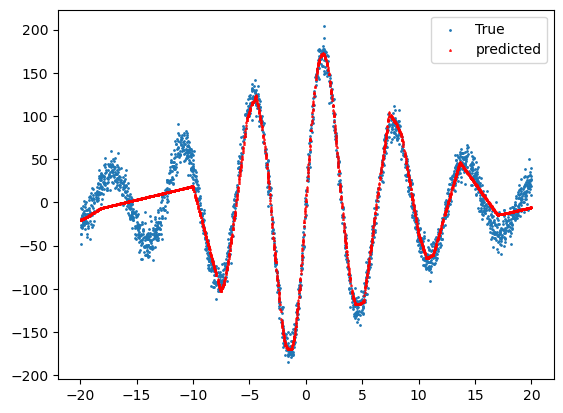

79/79 [==============================] - 0s 464us/step
Epoch: 180


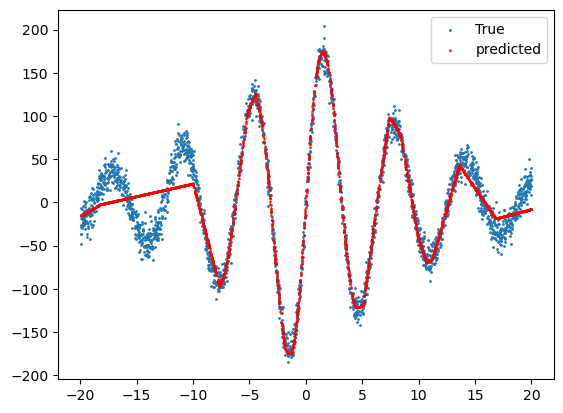

79/79 [==============================] - 0s 461us/step
Epoch: 185


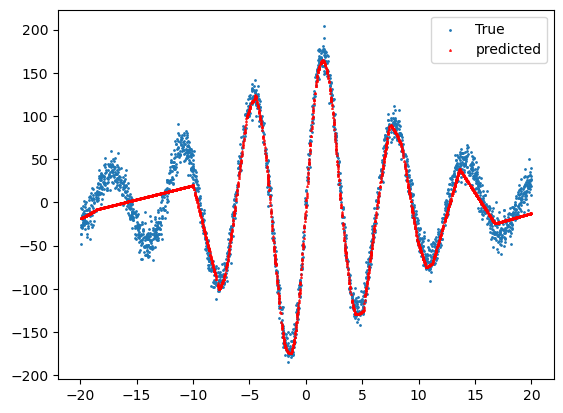

79/79 [==============================] - 0s 625us/step
Epoch: 190


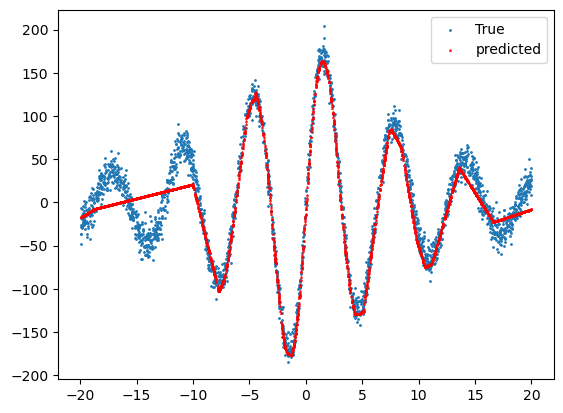

79/79 [==============================] - 0s 560us/step
Epoch: 195


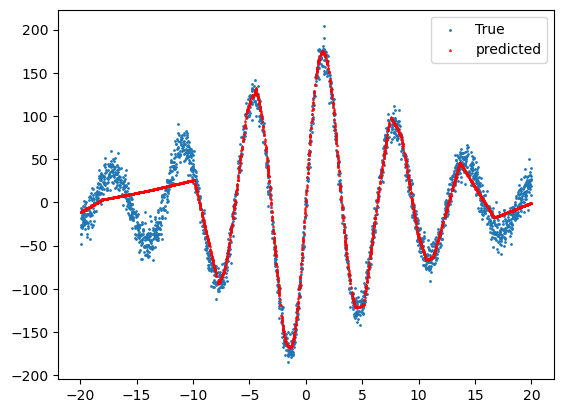

79/79 [==============================] - 0s 474us/step
Epoch: 200


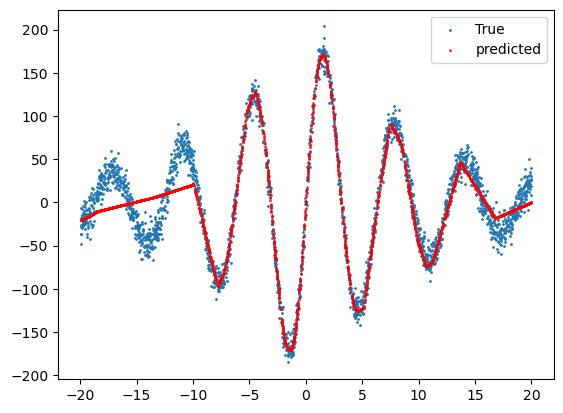

In [37]:
n=5
for _ in range(1,201):
  model.fit(x_train,y_train,epochs=1,batch_size=100,verbose=0,validation_data=(x_val,y_val))
  
  if _%n==0:
      y_val_pred=model.predict(x_val)
      print ("Epoch:",_)
      plt.scatter(x_val,y_val,marker="o",s=1,label="True")
      plt.scatter(x_val,y_val_pred,marker="^",c="r",s=1,label="predicted")
      plt.legend(loc="best")
      plt.show()